In [52]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.nn.functional as F
import scipy.stats as stats
import sympy as sym
import sympy.plotting as syp

In [3]:
nv = np.array([1, 2, 3]) # numpy vector
nM = np.array([[1, 2, 3], [4, 5, 6]]) # numpy matrix
tv = torch.tensor([1, 2, 3]) # torch vector
tM = torch.tensor([[1, 2, 3], [4, 5, 6]]) # torch matrix

print(nv, type(nv))
print(nM, type(nM))
print(tv, type(tv))
print(tM, type(tM))

[1 2 3] <class 'numpy.ndarray'>
[[1 2 3]
 [4 5 6]] <class 'numpy.ndarray'>
tensor([1, 2, 3]) <class 'torch.Tensor'>
tensor([[1, 2, 3],
        [4, 5, 6]]) <class 'torch.Tensor'>


In [4]:
nv1 = np.array([1, 2, 3])
nv2 = np.array([4, 5, 6])

# dot product using numpy
print(nv1 @ nv2)
print(nv1.dot(nv2))
print(np.dot(nv1, nv2))
print(np.sum(nv1 * nv2))

32
32
32
32


In [5]:
tv1 = torch.tensor([1, 2, 3])
tv2 = torch.tensor([4, 5, 6])

# dot product using torch
print(tv1 @ tv2)
print(tv1.dot(tv2))
print(torch.dot(tv1, tv2))
print(torch.sum(tv1 * tv2))

tensor(32)
tensor(32)
tensor(32)
tensor(32)


In [6]:
A = np.random.rand(3, 4)
B = np.random.rand(4, 5)

# matrix multiplication using numpy
print(A @ B)
print(A.dot(B))
print(np.dot(A, B))

[[0.3512969  0.7198789  0.24035425 0.62494773 0.6017422 ]
 [0.45082624 0.80623795 0.49656859 0.75310972 0.78445121]
 [0.63250685 1.15547423 0.87801739 1.2407115  1.34074137]]
[[0.3512969  0.7198789  0.24035425 0.62494773 0.6017422 ]
 [0.45082624 0.80623795 0.49656859 0.75310972 0.78445121]
 [0.63250685 1.15547423 0.87801739 1.2407115  1.34074137]]
[[0.3512969  0.7198789  0.24035425 0.62494773 0.6017422 ]
 [0.45082624 0.80623795 0.49656859 0.75310972 0.78445121]
 [0.63250685 1.15547423 0.87801739 1.2407115  1.34074137]]


In [7]:
At = torch.rand(3, 4)
Bt = torch.rand(4, 5)

# matrix multiplication using torch
print(At @ Bt)
print(At.matmul(Bt))
print(torch.matmul(At, Bt))

tensor([[0.5793, 1.2542, 1.2138, 0.7394, 0.5580],
        [0.7018, 1.2245, 1.0904, 1.0149, 1.5120],
        [0.7880, 1.8717, 1.7148, 1.4248, 1.5761]])
tensor([[0.5793, 1.2542, 1.2138, 0.7394, 0.5580],
        [0.7018, 1.2245, 1.0904, 1.0149, 1.5120],
        [0.7880, 1.8717, 1.7148, 1.4248, 1.5761]])
tensor([[0.5793, 1.2542, 1.2138, 0.7394, 0.5580],
        [0.7018, 1.2245, 1.0904, 1.0149, 1.5120],
        [0.7880, 1.8717, 1.7148, 1.4248, 1.5761]])


In [8]:
# to create a torch tensor from a numpy matrix
A = np.random.rand(3, 4)
At1 = torch.from_numpy(A)
At2 = torch.tensor(A)
print(At1)
print(At2)

tensor([[0.5798, 0.0410, 0.7125, 0.0048],
        [0.1723, 0.0202, 0.0900, 0.3636],
        [0.7579, 0.7745, 0.3489, 0.4573]], dtype=torch.float64)
tensor([[0.5798, 0.0410, 0.7125, 0.0048],
        [0.1723, 0.0202, 0.0900, 0.3636],
        [0.7579, 0.7745, 0.3489, 0.4573]], dtype=torch.float64)


In [9]:
# compute manually the softmax of a vector
z = np.array([1.0, 2.0, 3.0])
def softmax(x):
    exp_x = np.exp(x)
    return exp_x / np.sum(exp_x)
print(softmax(z))

# using torch
z_torch = torch.tensor([1.0, 2.0, 3.0])
softmax_torch = nn.Softmax(dim=0) # dim=0 for vectors, dim=1 for matrices
print(softmax_torch(z_torch))

[0.09003057 0.24472847 0.66524096]
tensor([0.0900, 0.2447, 0.6652])


In [10]:
# logs and exp in numpy
x = np.array([1.0, 2.0, 3.0])
print(np.log(x))
print(np.exp(x))

# logs and exp in torch
x_torch = torch.tensor([1.0, 2.0, 3.0])
print(torch.log(x_torch))
print(torch.exp(x_torch))

[0.         0.69314718 1.09861229]
[ 2.71828183  7.3890561  20.08553692]
tensor([0.0000, 0.6931, 1.0986])
tensor([ 2.7183,  7.3891, 20.0855])


In [11]:
# mean and std in numpy
x = np.array([1.0, 2.0, 3.0, 4.0, 5.0])
print(np.mean(x))
print(np.std(x, ddof=0)) # population std, 1/N
print(np.std(x, ddof=1)) # sample std, 1/(N-1)
print(np.std(x)) # default is ddof=0, population std, 1/N

3.0
1.4142135623730951
1.5811388300841898
1.4142135623730951


In [12]:
# mean and std in torch
x_torch = torch.tensor([1.0, 2.0, 3.0, 4.0, 5.0])
print(torch.mean(x_torch))
print(torch.std(x_torch, unbiased=False)) # population std, 1/N. also called biased std
print(torch.std(x_torch, unbiased=True)) # sample std, 1/(N-1)
print(torch.std(x_torch)) # default is unbiased=True, sample std, 1/(N-1)

tensor(3.)
tensor(1.4142)
tensor(1.5811)
tensor(1.5811)


In [13]:
# Calculate the entropy formula that represents the uncertainty of a binary random variable 
# with probability p of being 1 and (1-p) of being 0. This will be used later in the cross-entropy 
# loss function for binary classification problems.
p = 0.25
H = -(p * np.log(p) + (1-p) * np.log(1-p)) # 
print(H)

0.5623351446188083


In [14]:
# Calculate the cross-entropy which represents the distance between the true distribution 
# and the predicted distribution for a binary classification problem. 
# the higher the cross-entropy, the worse the prediction
y_true = np.array([1, 0]) # true labels
y_pred = np.array([0.7, 0.3]) # predicted probabilities
cross_entropy = -np.sum(y_true * np.log(y_pred))
print(cross_entropy)

0.35667494393873245


In [15]:
q_tensor = torch.tensor([0.7, 0.3])
p_tensor = torch.tensor([1.0, 0.0])
print(-torch.sum(p_tensor * torch.log(q_tensor)))
print(F.binary_cross_entropy(q_tensor, p_tensor))

tensor(0.3567)
tensor(0.3567)


In [ ]:
v = np.array([1.0, 2.0, 3.0, -5.0, 6.0])

M = np.array([[1.0, 2.0, 3.0], [-5.0, 6.0, 7.0]])

print(np.min(v), np.max(v), np.argmin(v), np.argmax(v))
print(np.min(M, axis=0), np.min(M, axis=1), np.min(M)) # the row or column with the minimum values
print(np.argmin(M, axis=0), np.argmin(M, axis=1), np.argmin(M)) # the index of the row or column with the minimum values

-5.0 6.0 3 4
[-5.  2.  3.] [ 1. -5.] -5.0
[1 0 0] [0 0] 3


In [20]:
# in torch
v_torch = torch.tensor([1.0, 2.0, 3.0, -5.0, 6.0])
M_torch = torch.tensor([[1.0, 2.0, 3.0], [-5.0, 6.0, 7.0]])
print(torch.min(v_torch), torch.max(v_torch), torch.argmin(v_torch), torch.argmax(v_torch))
print(torch.min(M_torch, dim=0), torch.min(M_torch, dim=1), torch.min(M_torch)) # the row or column with the minimum values
print(torch.argmin(M_torch, dim=0), torch.argmin(M_torch, dim=1), torch.argmin(M_torch)) # the index of the row or column with the minimum values

tensor(-5.) tensor(6.) tensor(3) tensor(4)
torch.return_types.min(
values=tensor([-5.,  2.,  3.]),
indices=tensor([1, 0, 0])) torch.return_types.min(
values=tensor([ 1., -5.]),
indices=tensor([0, 0])) tensor(-5.)
tensor([1, 0, 0]) tensor([0, 0]) tensor(3)


In [23]:
torch.min(M_torch, dim=1).values, torch.min(M_torch, dim=1).indices

(tensor([ 1., -5.]), tensor([0, 0]))

In [33]:
# generating randomness

# old method
np.random.seed(0) # set the seed for reproducibility
print(np.random.rand(5)) # generate a 3x4 matrix of random numbers between 0 and 1

# new method
randseed1 = np.random.RandomState(seed=0) # create a random state object with a seed for reproducibility
print(randseed1.rand(5))

[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548 ]
[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548 ]


In [ ]:
# randomness in torch

torch.manual_seed(0) # set the seed for reproducibility
print(torch.rand(5)) # generate a 3x4 matrix of random numbers between

# torch'seed doesn't spread to numpy

tensor([0.4963, 0.7682, 0.0885, 0.1320, 0.3074])


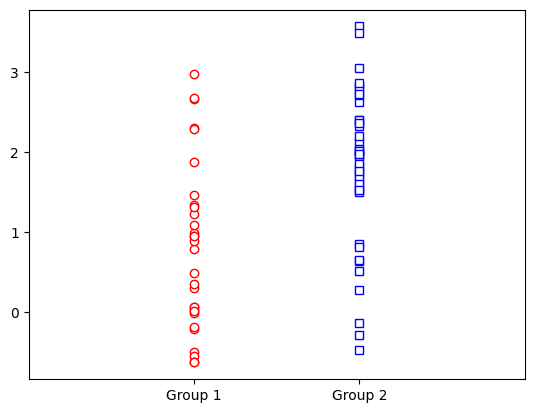

In [48]:
# A t-test is a statistical test used to determine if there is a significant 
# difference between the means of two groups.
n1 = 30
n2 = 40
mu1 = 1
mu2 = 2
data1 = mu1 + np.random.randn(n1) # group 1 data
data2 = mu2 + np.random.randn(n2) # group 2 data

plt.plot(np.zeros(n1), data1, 'ro', markerfacecolor="w")
plt.plot(np.ones(n2), data2, 'bs', markerfacecolor="w")
plt.xlim(-1, 2)
plt.xticks([0, 1], ['Group 1', 'Group 2'])
plt.show()

In [ ]:
# H0 : there is no difference between the two groups (mu1 = mu2)
# H1 : there is a difference between the two groups (mu1 != mu2)

t, p = stats.ttest_ind(data1, data2)
print(f't-statistic: {t:.4f}, p-value: {p:.4f}')
# since p-value is less than 0.05, we can reject the null hypothesis and conclude 
# that there is a significant difference between the two groups.

t-statistic: -4.0563, p-value: 0.0001


4*x + 3


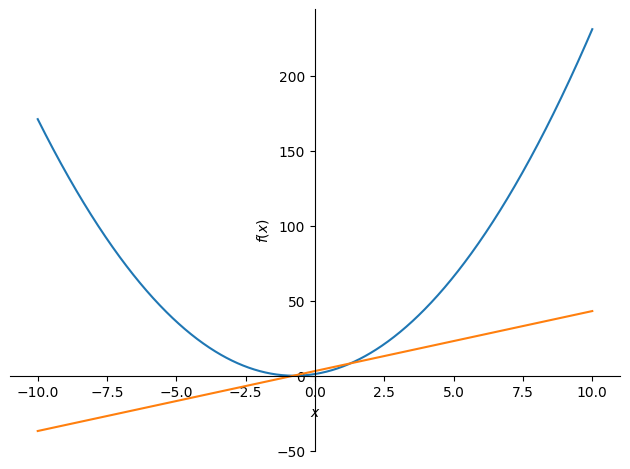

In [60]:
x = sym.symbols('x')
fx = 2*x**2 + 3*x + 1
df = sym.diff(fx, x)
print(df)
p = syp.plot(fx, (x, -10, 10), show=False)
p.extend(syp.plot(df, (x, -10, 10), show=False))
p.show()

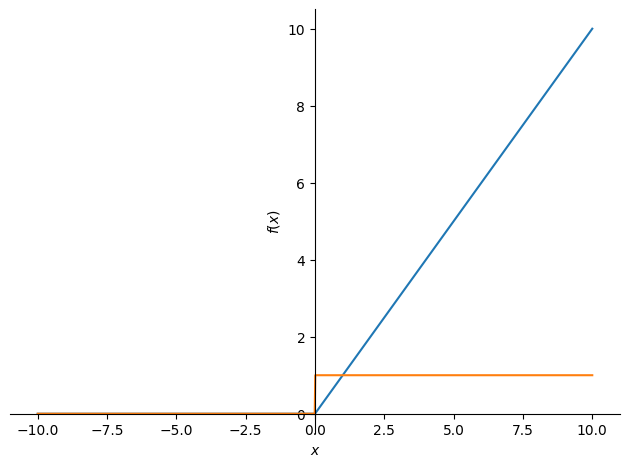

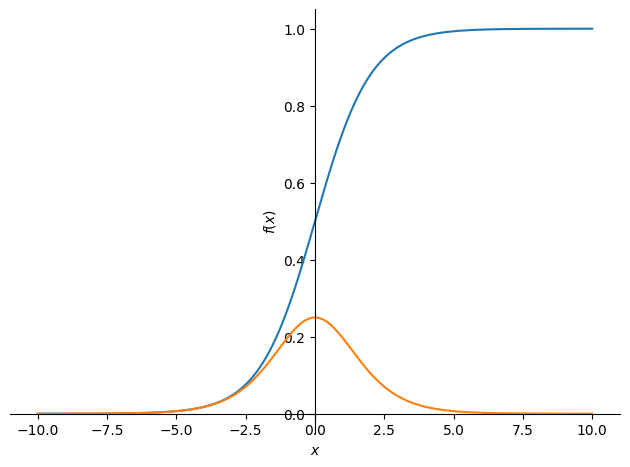

In [61]:
# repeat with Relu
relu = sym.Max(0, x)
sigmoid = 1 / (1 + sym.exp(-x))

# graph the functions
p = syp.plot(relu, (x, -10, 10), show=False)
p.extend(syp.plot(sym.diff(relu, x), (x, -10, 10), show=False))
p.show()

p = syp.plot(sigmoid, (x, -10, 10), show=False)
p.extend(syp.plot(sym.diff(sigmoid, x), (x, -10, 10), show=False))
p.show()

In [68]:
# chain rule
fx = 2*x**2 + 3*x + 1
gx = fx**2

print(sym.diff(gx, x)) # direct differentiation

(8*x + 6)*(2*x**2 + 3*x + 1)


In [16]:
nums1 = [1,2,3,0,0,0]
nums2 = [2,5,6]

nums1 = nums1[:3] + nums2[:3]
nums1.sort()
nums1

[1, 2, 2, 3, 5, 6]